In [1]:
# If you are going in order re: the lessons, you should have already downloaded the data file!

import pandas as pd
import numpy as np
import chardet    

edata = open('CU_data_July2017_full.csv', 'rb').read()
result = chardet.detect(edata)
encode = result['encoding']

tdata = pd.read_csv('CU_data_July2017_full.csv',index_col='Day',skiprows = 3,skipfooter=14,engine='python',
                      encoding = encode) # 
tdata = tdata.drop(['Time (CST)','Time (CST).1', '4 inch','8 inch','Morning Low','Comments'],axis=1)
tdata = tdata.rename(columns={"Low": "T_low", "High": "T_high"})

## BASIC STATISTICS & CHARACTERISTICS
- many statisical functions will take an argument for axis
- remember that axis = 0 is row, axis = 1 is column!
<br><br>
- many statistical functions take an argument for not considering NaNs!
<br><br>
- **super handy**: *data.describe*: method in Pandas that returns stats about each column

In [2]:
tdata.describe() 

,T_high,T_low,Mean,Depart,Heating,Cooling,Precipitation,Snowfall,Snow Depth
count,30.000000,31.000000,30.000000,30.000000,30.0,30.000000,31.000000,31.0,31.0
mean,86.533333,65.774194,76.300000,1.500000,0.0,11.300000,0.090323,0.0,0.0
std,3.848272,4.232491,3.405371,3.277404,0.0,3.405371,0.191459,0.0,0.0
min,79.000000,59.000000,70.000000,-5.000000,0.0,5.000000,0.000000,0.0,0.0
25%,84.000000,62.500000,74.000000,-1.000000,0.0,9.000000,0.000000,0.0,0.0
50%,87.000000,66.000000,75.500000,1.500000,0.0,10.500000,0.000000,0.0,0.0
75%,89.000000,69.000000,79.000000,4.000000,0.0,14.000000,0.060000,0.0,0.0
max,94.000000,74.000000,83.000000,8.000000,0.0,18.000000,0.680000,0.0,0.0


- other methods that give you statistics/characteristics

In [3]:
# Shape of the data structure
tdata.shape # returns tuple of rows, columns

(31, 9)

In [4]:
# Maximum of each column (variable)
tdata.max(axis=0)

T_high           94.00
T_low            74.00
Mean             83.00
Depart            8.00
Heating           0.00
Cooling          18.00
Precipitation     0.68
Snowfall          0.00
Snow Depth        0.00
dtype: float64

In [5]:
# Maximum of just specified variable
tdata['T_high'].max(axis=0)

94.0

In [6]:
# Minimum of each variable 
tdata.min(axis=0)

T_high           79.0
T_low            59.0
Mean             70.0
Depart           -5.0
Heating           0.0
Cooling           5.0
Precipitation     0.0
Snowfall          0.0
Snow Depth        0.0
dtype: float64

In [7]:
# Mean of each variable
tdata.mean(axis=0)

T_high           86.533333
T_low            65.774194
Mean             76.300000
Depart            1.500000
Heating           0.000000
Cooling          11.300000
Precipitation     0.090323
Snowfall          0.000000
Snow Depth        0.000000
dtype: float64

In [8]:
# Standard deviation of each variable
tdata.std(axis=0)

T_high           3.848272
T_low            4.232491
Mean             3.405371
Depart           3.277404
Heating          0.000000
Cooling          3.405371
Precipitation    0.191459
Snowfall         0.000000
Snow Depth       0.000000
dtype: float64

In [9]:
# n largest values
tdata['T_high'].nlargest(3)

Day
21    94.0
7     92.0
20    92.0
Name: T_high, dtype: float64

## OUTPUTTING TO A CSV FILE
- **syntax**: data.out_csv(various options)
  - example options:
    - which columns to output
    - if data has a header
    - missing data representation used 
    - file location

In [10]:
# Simplest - write out tdata as is to the designated file
tdata.to_csv('temp_data_test.csv') # Make sure this file isn't currently open!

## MORE ON PLOTTING IN PANDAS
- the build-in plotting functions in Pandas (which call Matplotlib) are really handy!
  - many customization options!

<AxesSubplot:xlabel='Day'>

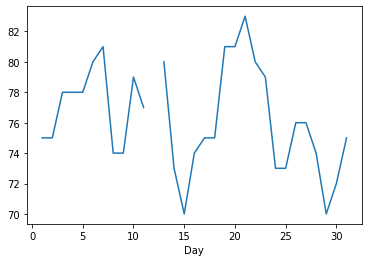

In [11]:
tdata['Mean'].plot()

<AxesSubplot:xlabel='Day'>

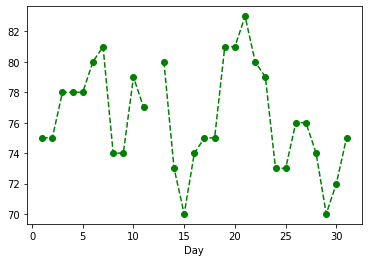

In [12]:
tdata['Mean'].plot(c='g',marker='o',linestyle='dashed')

<AxesSubplot:ylabel='Frequency'>

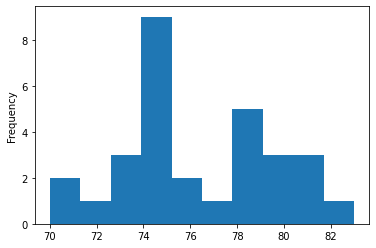

In [13]:
tdata['Mean'].plot.hist()

<AxesSubplot:xlabel='Day'>

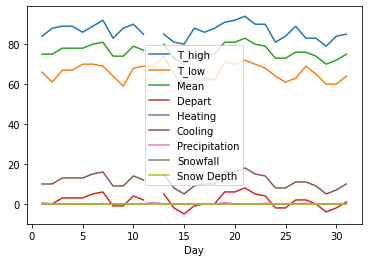

In [14]:
tdata.plot.line()

<AxesSubplot:xlabel='Day'>

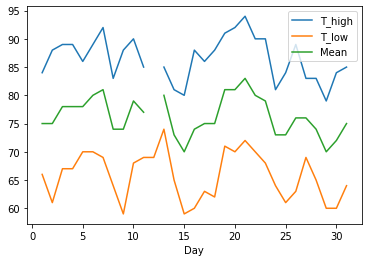

In [15]:
tdata[['T_high','T_low','Mean']].plot.line()